In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# This code is to remove scientific notation for easier analysis
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=8, suppress= True)

# This code is to remove the 'SettingWithCopyWarning' message.
pd.set_option('mode.chained_assignment', None)

In [2]:
# Reading IN data
companies = pd.read_csv('companies.csv',encoding = "ISO-8859-1")
rounds = pd.read_csv('rounds2.csv',encoding = "ISO-8859-1")
mapping = pd.read_csv('mapping.csv')

In [3]:
#No of unique companies in companies.csv
len(companies['permalink'].unique())

66368

In [4]:
#No of unique companies in rounds2.csv
len(rounds['company_permalink'].unique())

90247

In [5]:
# Viewing our data attributes
companies.info()
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2  

In [6]:
# To check how many companies in Round2 that are not present in companies
rounds['company_permalink'].str.lower().isin(companies['permalink'].str.lower()).value_counts()

True     114942
False         7
Name: company_permalink, dtype: int64

In [7]:
# Countries with english as their primary language taken from wiki
english_speak = ['AUS', 'NZL', 'GBR', 'USA', 'ATG', 'BHS', 'BRB', 'BLZ', 'BWA', 'BDI', 'CMR', 'CAN', 'DMA', 'SWZ', 'FJI', 'GMB', 'GHA', 'GRD', 'GUY', 'IND', 'IRL', 'JAM', 'KEN', 'KIR', 'LSO', 'LBR', 'MWI', 'MLT', 'MHL', 'MUS', 'FSM', 'NAM', 'NRU', 'NGA', 'PAK', 'PLW', 'PNG', 'PHL', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SYC', 'SLE', 'SGP', 'SLB', 'ZAF', 'SSD', 'SDN', 'TZA', 'TON', 'TTO', 'TUV', 'UGA', 'VUT', 'ZMB', 'ZWE']

In [8]:
# change company_permalink to permalink in Rounds2 dataframe
rounds.rename(columns={'company_permalink':'permalink'}, inplace =True )

In [9]:
# make the permalink to lowercase for both df's so they can merge
companies['permalink'] = companies['permalink'].str.lower()
rounds['permalink'] = rounds['permalink'].str.lower()

In [10]:
# Merging the 2 dataframes
master_frame = pd.merge(companies, rounds , how='inner', on='permalink')

In [98]:
# Number of entries in the master frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 78687
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           62988 non-null  object 
 1   name                62988 non-null  object 
 2   country_code        62988 non-null  object 
 3   funding_round_type  62988 non-null  object 
 4   raised_amount_usd   62988 non-null  float64
 5   main_sector         62988 non-null  object 
 6   in_range            62988 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.8+ MB


In [12]:
# Adding a column to master_frame that indicates if a country's official languane is English
master_frame['english'] = master_frame['country_code'].apply(lambda x: 'yes' if x in english_speak else "no")

In [13]:
# removing NA items from country code
master_frame['country_code'].isnull().value_counts()

False    106271
True       8671
Name: country_code, dtype: int64

In [14]:
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [15]:
# removing entries that are not from enlish speaking countries
master_frame = master_frame[master_frame['english'] == 'yes']

## <br><br><br><br>Mapping various sub-sectors to its main sector 

In [16]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [17]:
#making catagory list lowercase on 'mapping' and 'master_frame'
mapping['category_list'] = mapping['category_list'].str.lower()
master_frame['category_list'] = master_frame['category_list'].str.lower()

In [18]:
m = pd.get_dummies(mapping).idxmax(1)

In [19]:
#converting this column name into a list. so it can later be added as a column 
k = []
for l in m:
    k.append(l)

In [20]:
mapping['main_sector'] = k

In [21]:
dk = mapping[['category_list', 'main_sector']]

In [22]:
dk = dk.set_index('category_list')

In [23]:
# removing null values from catagory list before mapping 
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [24]:
# Cleaning the catagory list column by removing addational entries
master_frame['category_list'] = master_frame['category_list'].apply(lambda x : x if '|' not in x else x[0 : x.index('|')])

In [25]:
# merging the mapped catagory list to df. This adds the main_sector sector column as well
master_frame = pd.merge(master_frame, dk, on='category_list')

In [26]:
# Creating column to indicate if investment in range of ours
master_frame['in_range'] = master_frame['raised_amount_usd'].apply(lambda x: 'yes' if (x >= 5000000) &  (x <= 15000000) else 'no')

In [27]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,english,main_sector,in_range
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,yes,Entertainment,yes
1,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00000,yes,Entertainment,yes
2,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00000,yes,Entertainment,yes
3,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00000,yes,Entertainment,no
4,/organization/a-b-productions,A.B Productions,NaN,media,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,nan,yes,Entertainment,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78683,/organization/wattblock,Wattblock,http://wattblock.com.au,building owners,operating,AUS,2,Sydney,Sydney,NaN,/funding-round/6807e154df32ca8c1b7c141f313ff318,seed,NaN,26-05-2015,nan,yes,"News, Search and Messaging",no
78684,/organization/wattblock,Wattblock,http://wattblock.com.au,building owners,operating,AUS,2,Sydney,Sydney,NaN,/funding-round/7ad52a06fc0281282f74ffc36badfe0b,seed,NaN,29-10-2014,48484.00000,yes,"News, Search and Messaging",no
78685,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,gay & lesbian,operating,USA,PA,Pittsburgh,Pittsburgh,07-10-2012,/funding-round/017fef93620f71e5b884435972b440e8,seed,NaN,17-04-2014,nan,yes,Others,no
78686,/organization/wing-ma-am,Wing Ma'am,http://www.wingmaam.com/,gay & lesbian,operating,USA,PA,Pittsburgh,Pittsburgh,07-10-2012,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,NaN,09-06-2013,25000.00000,yes,Others,no


## <br><br><br><br> Cleaning and removing columns that wont be used

In [28]:
# removed null of ['raised_amount_usd']. Since our final decision will depend on this column, will remove NA instead of impute.
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

In [29]:
# removing values where 'raised_amount_usd' is 0
master_frame = master_frame[master_frame['raised_amount_usd'] != 0]

In [30]:
#droping [funding type code]
master_frame = master_frame.drop('funding_round_code', axis = 1)

In [31]:
# droping the column ['english']
master_frame = master_frame.drop('english', axis = 1)

In [32]:
# removing companies where the column Status == 'closed'
master_frame = master_frame[master_frame['status'] != 'closed']

In [33]:
# droping the column ['homepage_url']
master_frame = master_frame.drop('homepage_url', axis = 1)

In [34]:
# droping ['status']
master_frame = master_frame.drop('status', axis = 1)

In [35]:
# droping ['region']
master_frame.drop('region', axis = 1, inplace = True)

In [36]:
# droping ['state_code']
master_frame.drop('state_code', axis = 1, inplace = True)

In [37]:
# droping ['funding_round_permalink']
master_frame.drop('funding_round_permalink', axis = 1, inplace = True)

In [38]:
# droping ['category_list']
master_frame.drop('category_list', axis = 1, inplace = True)

In [39]:
# droping ['founded_at']
master_frame.drop('founded_at', axis = 1, inplace = True)

In [40]:
# droping ['funded_at']
master_frame.drop('funded_at', axis = 1, inplace = True)

In [41]:
# droping ['city']
master_frame.drop('city', axis = 1, inplace = True)

In [42]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 78687
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           62988 non-null  object 
 1   name                62988 non-null  object 
 2   country_code        62988 non-null  object 
 3   funding_round_type  62988 non-null  object 
 4   raised_amount_usd   62988 non-null  float64
 5   main_sector         62988 non-null  object 
 6   in_range            62988 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.8+ MB


In [43]:
master_frame

,permalink,name,country_code,funding_round_type,raised_amount_usd,main_sector,in_range
0,/organization/-fame,#fame,IND,venture,10000000.00000,Entertainment,yes
1,/organization/90min,90min,GBR,venture,15000000.00000,Entertainment,yes
2,/organization/90min,90min,GBR,venture,5800000.00000,Entertainment,yes
3,/organization/90min,90min,GBR,venture,18000000.00000,Entertainment,no
5,/organization/a-dance-for-me,A Dance for Me,USA,equity_crowdfunding,1090000.00000,Entertainment,no
...,...,...,...,...,...,...,...
78678,/organization/welink,WeLink,USA,seed,20000.00000,"Social, Finance, Analytics, Advertising",no
78682,/organization/user-interface,User Interface,USA,venture,8250000.00000,Others,yes
78684,/organization/wattblock,Wattblock,AUS,seed,48484.00000,"News, Search and Messaging",no
78686,/organization/wing-ma-am,Wing Ma'am,USA,seed,25000.00000,Others,no


# <br><br><br><br> Investment Type Analysis

## Most representative of central tendency of different investment types

### Venture

In [44]:
# All the investments that correspond to venture
venture = master_frame[(master_frame['funding_round_type'] =='venture') & master_frame['raised_amount_usd']]['raised_amount_usd']

In [45]:
venture.describe()

count         35544.00000
mean       11700645.63018
std       100513510.52341
min               1.00000
25%         1597089.75000
50%         5000000.00000
75%        12000000.00000
max     17600000000.00000
Name: raised_amount_usd, dtype: float64

In [46]:
# Number of venture investmenrs that are above 100,000,000
len(venture[venture >100000000])

261

In [47]:
# Percentage of the number investments above 100000000
round(len(venture[venture >100000000]) / len(venture) *100, 2)

0.73

In [48]:
# percentage of the total investments that are  above 100000000
venture[venture >100000000].sum() / venture.sum() *100

19.64330341229364

#### We can see that 0.73% of the number of investments, take up 19.64% of the total investment<br><br>Since we have extreme outliers, the Median is the best representation of the venture investment
 

### <br>Private Equity

In [49]:
# All the investments that correspond to private_equity
private = master_frame[(master_frame['funding_round_type'] =='private_equity') & master_frame['raised_amount_usd']]['raised_amount_usd']
private.describe()

count         1313.00000
mean      64969911.34882
std      156030896.15023
min           1660.00000
25%        5280000.00000
50%       20000000.00000
75%       70000000.00000
max     3500000000.00000
Name: raised_amount_usd, dtype: float64

In [50]:
#Percentage of the number of investments under private_equity above 1000000000
round(len(private[private >1000000000]) / len(private) *100, 2)

0.46

In [51]:
# percentage of the total investments that are  above 100000000
private[private >1000000000].sum() / private.sum() *100

12.013898410734782

#### This shows that 0.46%  of the number of investmenrs occupy 12% of the total investmenrs. These are clearly outliers<br><br>Since we have extreme outliers, the Median is the best representation of the private equity


### <br> Angel

In [52]:
# All the investments that correspond to Angel investment
angel = master_frame[(master_frame['funding_round_type'] =='angel') & master_frame['raised_amount_usd']]['raised_amount_usd']
angel.describe()

count       2468.00000
mean      858406.33023
std      1526080.08457
min           12.00000
25%       200000.00000
50%       500000.00000
75%      1000000.00000
max     40000000.00000
Name: raised_amount_usd, dtype: float64

In [53]:
# We viewing the data without outliers, changes the mean dramatically. 
angel[angel < 7000000.00000].describe()

count      2449.00000
mean     769854.60433
std      900730.56821
min          12.00000
25%      200000.00000
50%      500000.00000
75%     1000000.00000
max     6850000.00000
Name: raised_amount_usd, dtype: float64

#### There is a steep rise after the 50th percentile. Also, removing outliers does not dtastically change the mean<br><br>  Mean is the best representation of the investment in Angel

### <br>Seed 

In [54]:
seed = master_frame[(master_frame['funding_round_type'] =='seed') & master_frame['raised_amount_usd']]['raised_amount_usd']
seed.describe()

count       13435.00000
mean       833410.88939
std       2593049.73607
min             1.00000
25%        100000.00000
50%        400000.00000
75%       1100000.00000
max     200000000.00000
Name: raised_amount_usd, dtype: float64

In [55]:
#Percentage of the number of investments under seed above 6000000
round(len(seed[seed >6000000]) / len(seed) *100, 2)

0.51

In [56]:
# percentage of the total investments that are  above 6000000
seed[seed >6000000].sum() / seed.sum() *100

10.510264994244444

####  This shows that 0.85%  of the number of investmenrs occupy 10.5% of the total investmenrs. <br><br> There is a huge increase between 75th percentile and the max. There are extreme outliers<br><br>Median is the best representation of the investment in seed investment<br><br><br>

## Most representative of investment type as per Spark Funds criteria

#### An analysis of the propotrion of each investment type that falls within 5 million to 15 million

In [57]:
# Creating a dataframe by filtering only the 4 relevant investment types
df_funds = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'angel')| (master_frame['funding_round_type'] == 'private_equity') ]

In [58]:
# Calculates the percentage of each of the total number of investments in each investment type that falls with Spark Funds range
df_funds.groupby('funding_round_type')['in_range'].value_counts(normalize = True) * 100

funding_round_type  in_range
angel               no         98.50081
                    yes         1.49919
private_equity      no         76.77075
                    yes        23.22925
seed                no         98.95795
                    yes         1.04205
venture             no         66.78202
                    yes        33.21798
Name: in_range, dtype: float64

#### 33.2% of venture capital investments fall within 5 million to 15 million <br><br>23.2% of private equity investments fall within 5 million to 15 million <br><br> 1.4% of angel investments fall within 5 million to 15 million <br><br> 1.04% of seed investments fall within 5 million to 15 million


### It is clear that the Venture Capital investment is most representative of Spark Funds criteria

 # <br><br>Country Analysis

In [59]:
# Dataframe that consists only of venture investments
df_venture = master_frame[master_frame['funding_round_type'] == 'venture']

In [60]:
#Groupby of country under venture 
country_v =  df_venture.groupby('country_code')

In [61]:
# Propotion of Venture capital investment made in each country
(country_v['raised_amount_usd'].sum() / (country_v['raised_amount_usd'].sum()).sum() * 100).sort_values(ascending = False)

country_code
USA   89.21614
GBR    4.11770
IND    3.18546
CAN    1.92498
SGP    0.61901
IRL    0.38626
AUS    0.28154
NZL    0.09952
ZAF    0.05330
NGA    0.03838
PHL    0.02733
PAK    0.01842
KEN    0.01297
GHA    0.00750
MLT    0.00426
KNA    0.00361
TTO    0.00204
UGA    0.00060
BWA    0.00054
MUS    0.00036
CMR    0.00009
Name: raised_amount_usd, dtype: float64

[]

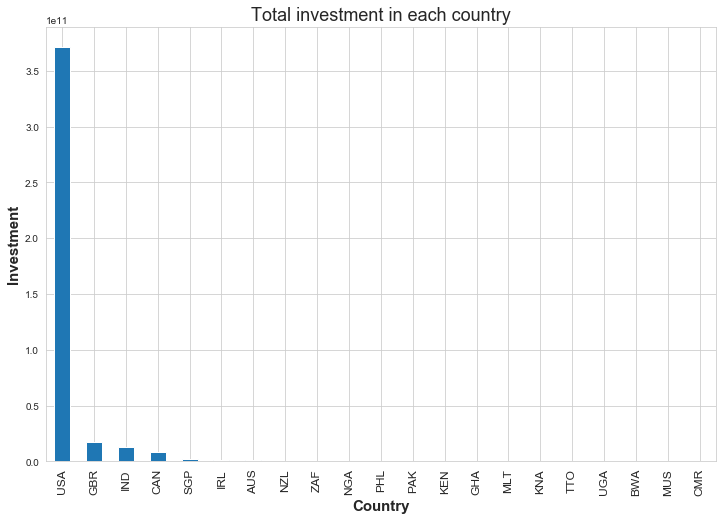

In [62]:
# Plot of total investment in each country
country_v['raised_amount_usd'].sum().sort_values(ascending = False).plot.bar(figsize =(12,8))
plt.title('Total investment in each country', fontsize = 18)
plt.xlabel("Country", fontsize = 15, weight = 'bold')
plt.ylabel('Investment',fontsize = 15, weight = 'bold')
plt.xticks( size='large')
plt.plot()

In [63]:
# Top 9 countries
country_v['raised_amount_usd'].sum().sort_values(ascending = False).head(9)

country_code
USA   371038978034.00000
GBR    17125001082.00000
IND    13247926235.00000
CAN     8005745380.00000
SGP     2574407291.00000
IRL     1606425009.00000
AUS     1170894156.00000
NZL      413880383.00000
ZAF      221663106.00000
Name: raised_amount_usd, dtype: float64

#### These are the top 9 countries <br><br><br><br>

In [64]:
# Creating a Dataframe called 'top9' that contains the top 9 countries based on investment

# list of top 9 countries
list9 = country_v['raised_amount_usd'].sum().sort_values(ascending = False).head(9).index

# Column to indicate if a country belongs to the top 9 by comparing to the list
df_venture['top_9'] = df_venture['country_code'].apply(lambda x : 'yes' if x in list9 else 'no')

# df with top9 countries under venture capital investment
top9 = df_venture[df_venture['top_9'] == 'yes']

In [65]:
top9

,permalink,name,country_code,funding_round_type,raised_amount_usd,main_sector,in_range,top_9
0,/organization/-fame,#fame,IND,venture,10000000.00000,Entertainment,yes,yes
1,/organization/90min,90min,GBR,venture,15000000.00000,Entertainment,yes,yes
2,/organization/90min,90min,GBR,venture,5800000.00000,Entertainment,yes,yes
3,/organization/90min,90min,GBR,venture,18000000.00000,Entertainment,no,yes
9,/organization/all-def-digital,All Def Digital,USA,venture,5000000.00000,Entertainment,yes,yes
...,...,...,...,...,...,...,...,...
78666,/organization/swajal,Swajal,IND,venture,1200000.00000,Cleantech / Semiconductors,no,yes
78674,/organization/thisnext,ThisNext,USA,venture,5000000.00000,"Social, Finance, Analytics, Advertising",yes,yes
78676,/organization/thisnext,ThisNext,USA,venture,1199999.00000,"Social, Finance, Analytics, Advertising",no,yes
78677,/organization/thisnext,ThisNext,USA,venture,2500000.00000,"Social, Finance, Analytics, Advertising",no,yes


In [66]:
#Top 3 englishs speaking countries and the proportion of venture capital investment
country_v['raised_amount_usd'].sum().sort_values(ascending = False).head(3) / (country_v['raised_amount_usd'].sum()).sum() *100

country_code
USA   89.21614
GBR    4.11770
IND    3.18546
Name: raised_amount_usd, dtype: float64

#### These are the top 3 countries <br><br>



# <br><br><br>Sector Analysis

Creating dataframes for each of the top 3 countries with the desired invetment type, and investments that are in Spark Funds investment range

In [67]:
# Dataframe of USA
d1 = df_venture[(df_venture['country_code'] == 'USA') & (df_venture['in_range'] == 'yes')]

In [68]:
# Dataframe of Great Britain
d2 = df_venture[(df_venture['country_code'] == 'GBR') & (df_venture['in_range'] == 'yes')]

In [69]:
# Dataframe of India
d3 = df_venture[(df_venture['country_code'] == 'IND') & (df_venture['in_range'] == 'yes')]

### <br> USA

In [70]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10404 entries, 9 to 78682
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           10404 non-null  object 
 1   name                10404 non-null  object 
 2   country_code        10404 non-null  object 
 3   funding_round_type  10404 non-null  object 
 4   raised_amount_usd   10404 non-null  float64
 5   main_sector         10404 non-null  object 
 6   in_range            10404 non-null  object 
 7   top_9               10404 non-null  object 
dtypes: float64(1), object(7)
memory usage: 731.5+ KB


#### There are 10404 venture capital investments in USA <br>

In [71]:
# Total amount of investment in USA (USD)
d1['raised_amount_usd'].sum()

93176222534.0

In [72]:
# Proportion of investments across different sectors
d1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False) / (d1.groupby('main_sector')['raised_amount_usd'].sum()).sum() * 100

main_sector
Others                                    26.20247
Cleantech / Semiconductors                21.17482
Social, Finance, Analytics, Advertising   17.07057
News, Search and Messaging                13.75260
Health                                     8.30022
Manufacturing                              7.19076
Entertainment                              4.83360
Automotive & Sports                        1.47495
Name: raised_amount_usd, dtype: float64

First  - Others <br>
Second - Cleantech / Semiconductors<br>
Third  - Social, Finance, Analytics, Advertising<br><br>

In [73]:
# number of investment in the top 3 sectors
d1['main_sector'].value_counts().sort_values(ascending = False).head(3)

Others                                     2732
Cleantech / Semiconductors                 2145
Social, Finance, Analytics, Advertising    1813
Name: main_sector, dtype: int64

[]

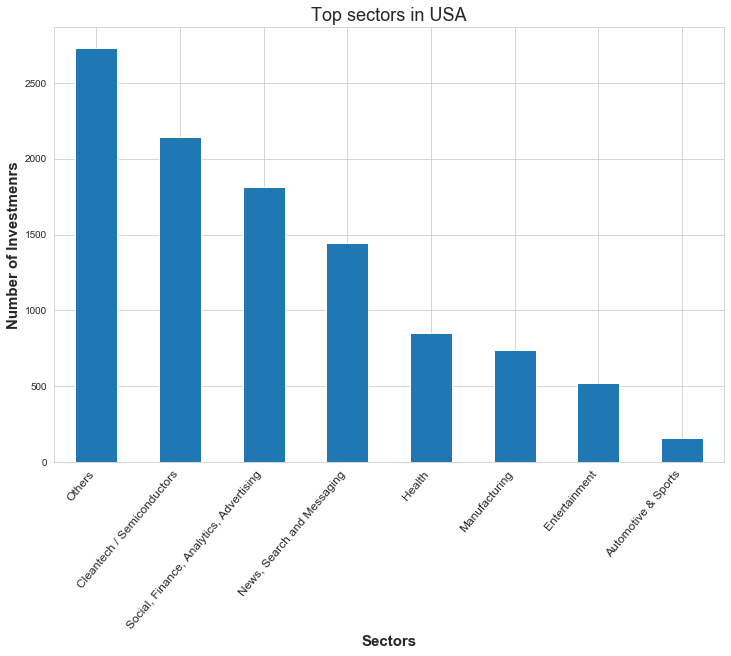

In [74]:
#Plot of top sectors in the US

d1['main_sector'].value_counts().sort_values(ascending = False).plot.bar(figsize =(12,8))
plt.title('Top sectors in USA', fontsize = 18)
plt.xlabel("Sectors", fontsize = 15, weight = 'bold')
plt.ylabel('Number of Investmenrs',fontsize = 15, weight = 'bold')
plt.xticks(rotation=50, horizontalalignment='right', size='large')
plt.plot()


In [75]:
# From the top sector (count-wise), which company received the highest investment?
topus_sector = d1[d1['main_sector'] == 'Others']
topus_sector.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/virtustream             64300000.00000
/organization/capella                 54968051.00000
/organization/airtight-networks       54201907.00000
/organization/decarta                 52100000.00000
/organization/black-duck-software     51000000.00000
                                           ...      
/organization/spree-commerce           5000000.00000
/organization/coalfire-system          5000000.00000
/organization/startforce               5000000.00000
/organization/clk-design-automation    5000000.00000
/organization/ecwid                    5000000.00000
Name: raised_amount_usd, Length: 1879, dtype: float64

In [76]:
# In the 'Others' sector, Virtustream received the highest investment of 64300000
topus_sector[topus_sector['permalink'] == '/organization/virtustream']['name'].head(1)

38273    Virtustream
Name: name, dtype: object

In [77]:
# From the second-best sector (count-wise), which company received the highest investment?
clean1 = d1[d1['main_sector'] == 'Cleantech / Semiconductors']
clean1.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/biodesix               75300000.00000
/organization/tigo-energy            68739496.00000
/organization/forsight-labs          61300001.00000
/organization/rheonix                56124758.00000
/organization/scienergy              55375423.00000
                                          ...      
/organization/psylin-neurosciences    5000000.00000
/organization/azuray-technologies     5000000.00000
/organization/gt-urological           5000000.00000
/organization/benchling               5000000.00000
/organization/kaai                    5000000.00000
Name: raised_amount_usd, Length: 1472, dtype: float64

In [78]:
# In the 'Cleantech / Semiconductors' sector, Biodesix received the highest investment of 75300000
clean1[clean1['permalink'] == '/organization/biodesix']['name'].head(1)

7654    Biodesix
Name: name, dtype: object

### <br> GBR

In [79]:
#Total Number of Investments in GBR
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 1 to 78194
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           542 non-null    object 
 1   name                542 non-null    object 
 2   country_code        542 non-null    object 
 3   funding_round_type  542 non-null    object 
 4   raised_amount_usd   542 non-null    float64
 5   main_sector         542 non-null    object 
 6   in_range            542 non-null    object 
 7   top_9               542 non-null    object 
dtypes: float64(1), object(7)
memory usage: 38.1+ KB


#### There are 542 venture capital investments in GBR <br>

In [80]:
# Total amount of investment in GBR (USD)
d2['raised_amount_usd'].sum()

4728734985.0

In [81]:
# Proportion of investments across different sectors
d2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False) / (d2.groupby('main_sector')['raised_amount_usd'].sum()).sum() * 100

main_sector
Others                                    25.15350
Cleantech / Semiconductors                21.74005
Social, Finance, Analytics, Advertising   16.86727
News, Search and Messaging                11.81078
Entertainment                              9.35221
Manufacturing                              7.26038
Health                                     4.28312
Automotive & Sports                        3.53269
Name: raised_amount_usd, dtype: float64

[]

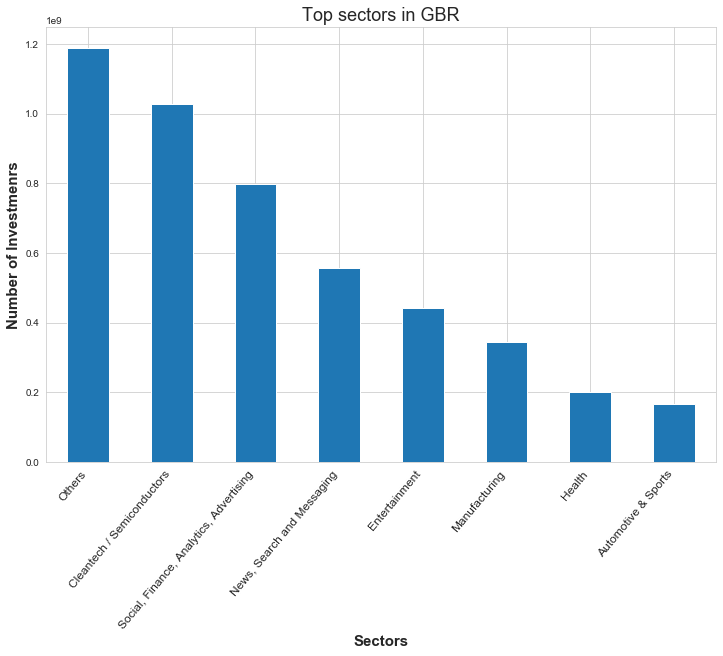

In [82]:
# Proportion of investments across different sectors
d2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).plot.bar(figsize =(12,8))
plt.title('Top sectors in GBR', fontsize = 18)
plt.xlabel("Sectors", fontsize = 15, weight = 'bold')
plt.ylabel('Number of Investmenrs',fontsize = 15, weight = 'bold')
plt.xticks(rotation=50, horizontalalignment='right', size='large')
plt.plot()


In [83]:
# From the top sector (count-wise), which company received the highest investment?
topgbr_sector = d2[d2['main_sector'] == 'Others']
topgbr_sector.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/electric-cloud            37000000.00000
/organization/sensage                   36250000.00000
/organization/silverrail-technologies   29000000.00000
/organization/opencloud                 27972766.00000
/organization/myoptique-group           27694613.00000
                                             ...      
/organization/bullguard                  5000000.00000
/organization/vector-watch               5000000.00000
/organization/bacula-systems             5000000.00000
/organization/photobox                   5000000.00000
/organization/parcelgenie                5000000.00000
Name: raised_amount_usd, Length: 113, dtype: float64

In [84]:
# In the 'Others' sector, Electric Cloud received the highest investment of 37000000
topgbr_sector[topgbr_sector['permalink'] == '/organization/electric-cloud']['name'].head(1)

2038    Electric Cloud
Name: name, dtype: object

In [85]:
# From the second-best sector (count-wise), which company received the highest investment?
clean2 = d2[d2['main_sector'] == 'Cleantech / Semiconductors']
clean2.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/eusa-pharma                                                     35600000.00000
/organization/horizon-discovery                                               31353719.00000
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h   29132906.00000
/organization/elixent                                                         25000000.00000
/organization/takeda-cambridge                                                22340000.00000
                                                                                   ...      
/organization/lamellar-biomedical                                              5301059.00000
/organization/mmic-solutions                                                   5250000.00000
/organization/flowline                                                         5104587.00000
/organization/ignis-energy                                                     5014644.00000
/organization/exco-intouch                                  

In [86]:
# In the 'Cleantech / Semiconductors' sector, EUSA Pharma received the highest investment of 35600000.00000
clean2[clean2['permalink'] == '/organization/eusa-pharma']['name'].head(1)

9574    EUSA Pharma
Name: name, dtype: object

### <br> IND

In [87]:
#Total Number of Investments in GBR
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 78413
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           287 non-null    object 
 1   name                287 non-null    object 
 2   country_code        287 non-null    object 
 3   funding_round_type  287 non-null    object 
 4   raised_amount_usd   287 non-null    float64
 5   main_sector         287 non-null    object 
 6   in_range            287 non-null    object 
 7   top_9               287 non-null    object 
dtypes: float64(1), object(7)
memory usage: 20.2+ KB


#### There are 287 venture capital investments in IND <br>

In [88]:
# Total amount of investment in GBR (USD)
d3['raised_amount_usd'].sum()

2569667552.0

In [89]:
# Proportion of investmenrs across different sectors
d3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False) / (d3.groupby('main_sector')['raised_amount_usd'].sum()).sum() * 100

main_sector
Others                                    36.35838
News, Search and Messaging                15.91002
Social, Finance, Analytics, Advertising   11.30666
Entertainment                             10.58814
Manufacturing                              7.81813
Cleantech / Semiconductors                 6.43585
Health                                     6.25528
Automotive & Sports                        5.32754
Name: raised_amount_usd, dtype: float64

[]

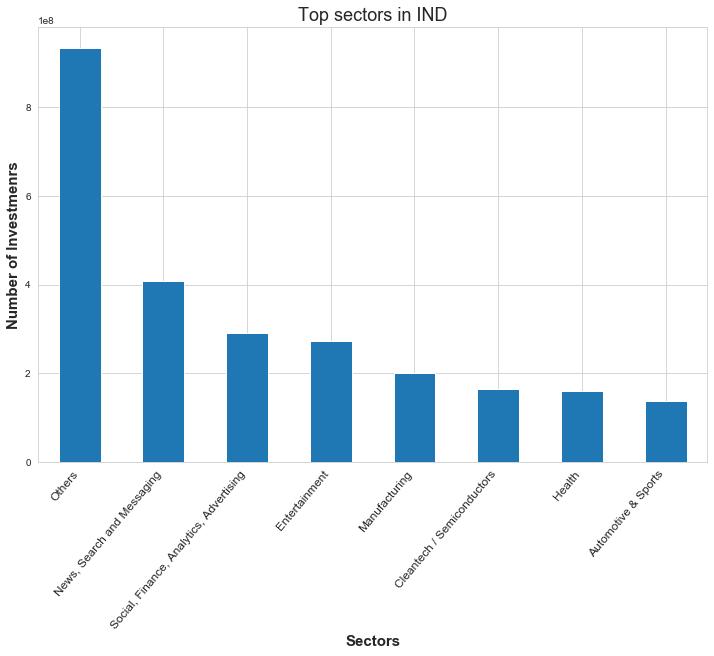

In [90]:
# Plot of Top sectors in India
d3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).plot.bar(figsize =(12,8))
plt.title('Top sectors in IND', fontsize = 18)
plt.xlabel("Sectors", fontsize = 15, weight = 'bold')
plt.ylabel('Number of Investmenrs',fontsize = 15, weight = 'bold')
plt.xticks(rotation=50, horizontalalignment='right', size='large')
plt.plot()



In [91]:
# From the top sector (count-wise), which company received the highest investment?
topind_sector = d3[d3['main_sector'] == 'Others']
topind_sector.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/firstcry-com          39000000.00000
/organization/myntra                38000000.00000
/organization/commonfloor           32900000.00000
/organization/pepperfry-com         28000000.00000
/organization/itzcash-card-ltd      25000000.00000
                                         ...      
/organization/voonik-com             5000000.00000
/organization/appsdaily-solutions    5000000.00000
/organization/vriti-infocom          5000000.00000
/organization/ameyo                  5000000.00000
/organization/tastykhana             5000000.00000
Name: raised_amount_usd, Length: 81, dtype: float64

In [92]:
# In the 'Others' sector, FirstCry.com received the highest investment of 39000000
topind_sector[topind_sector['permalink'] == '/organization/firstcry-com']['name'].head(1)

22759    FirstCry.com
Name: name, dtype: object

In [93]:
# From the second-best sector (count-wise), which company received the highest investment?
news1 = d3[d3['main_sector'] == 'News, Search and Messaging']
news1.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(3)

permalink
/organization/gupshup-technology-india-pvt-ltd   33000000.00000
/organization/imimobile                          23000000.00000
/organization/sms-gupshup                        22000000.00000
Name: raised_amount_usd, dtype: float64

In [94]:
# In the 'News, Search and Messaging' sector, GupShup received the highest investment of 33000000
news1[news1['permalink'] == '/organization/gupshup-technology-india-pvt-ltd']['name'].head(1)

16100    GupShup
Name: name, dtype: object

# <br><br><br> Plot

## <br><br> Investment Type

### A plot showing the total investment of different countries in Venture capital      

[]

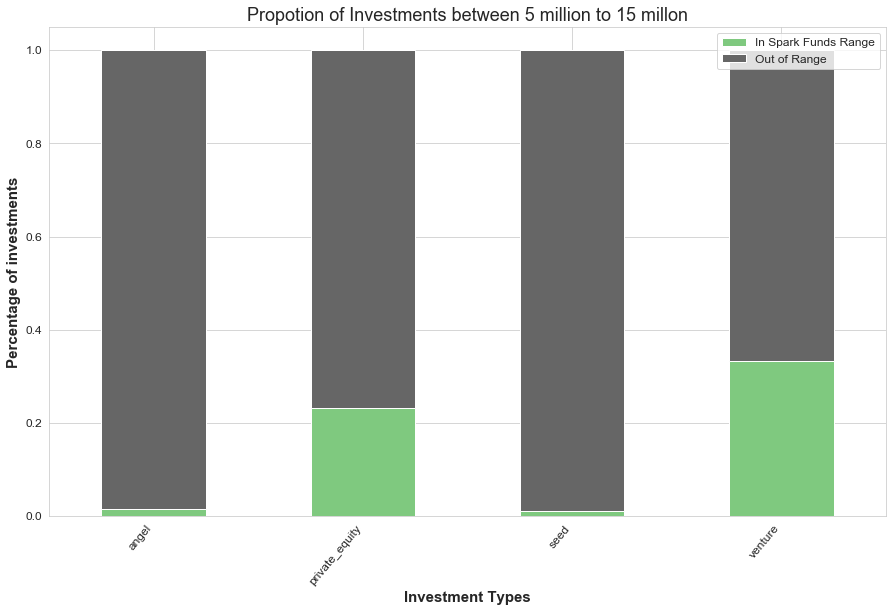

In [95]:
# A plot showing the proportion of the investments that fall within Spark Funds range within each investment type

df_funds['a'] = df_funds['in_range'].apply(lambda x: 1 if x == 'yes' else 0)
df_funds['b'] = df_funds['in_range'].apply(lambda x: 0 if x == 'yes' else 1)

g = pd.pivot_table(data = df_funds, values = ('a', 'b'), index='funding_round_type')
g.plot.bar(stacked = True, colormap ='Accent', figsize = (15,9), fontsize = 12)
plt.title('Propotion of Investments between 5 million to 15 millon', fontsize = 18)
plt.xlabel("Investment Types", fontsize = 15, weight = 'bold')
plt.ylabel('Percentage of investments',fontsize = 15, weight = 'bold')
plt.xticks(rotation=50, horizontalalignment='right', size='large')
label = ['In Spark Funds Range', 'Out of Range']

plt.legend(prop={'size': 12},labels =label )



plt.plot()

#### This shows that 33% of all investments venture capital investments fall within spark funds range

### <br><br><br><br>Total investments in top9 countries

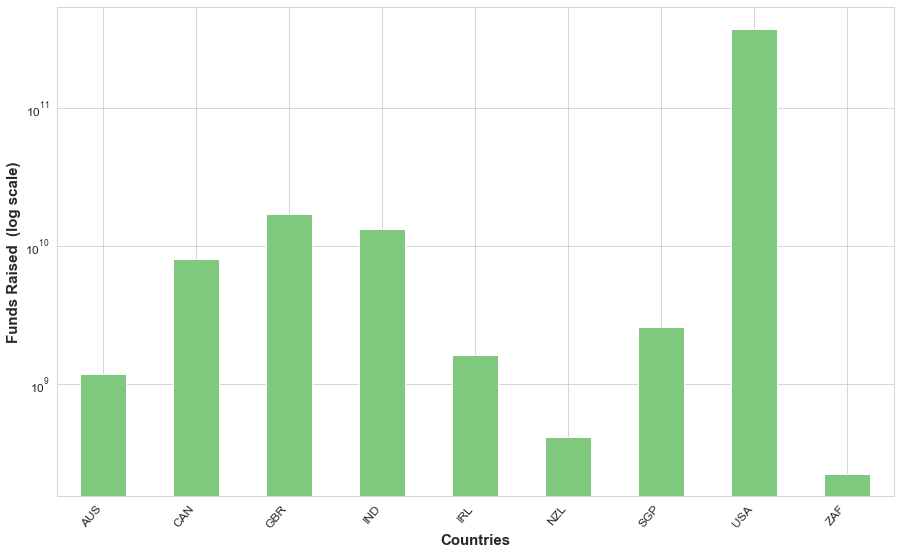

In [96]:
# plotting the top9 countries that receieved the highst investmenrs within Venture capital

gp9_c = top9.groupby(['country_code'] )
gp9_c['raised_amount_usd'].sum().plot.bar(colormap ='Accent', figsize = (15,9), fontsize = 12)


plt.xlabel("Countries", fontsize = 15, weight = 'bold')
plt.ylabel('Funds Raised  (log scale)',fontsize = 15, weight = 'bold')
plt.xticks(rotation=50, horizontalalignment='right', size='large')

plt.yscale('log')

#### *Note -  the graph has been ploted on a log scale <br><br><br>

### Top 3 sectors of the top 3 countries on one chart 

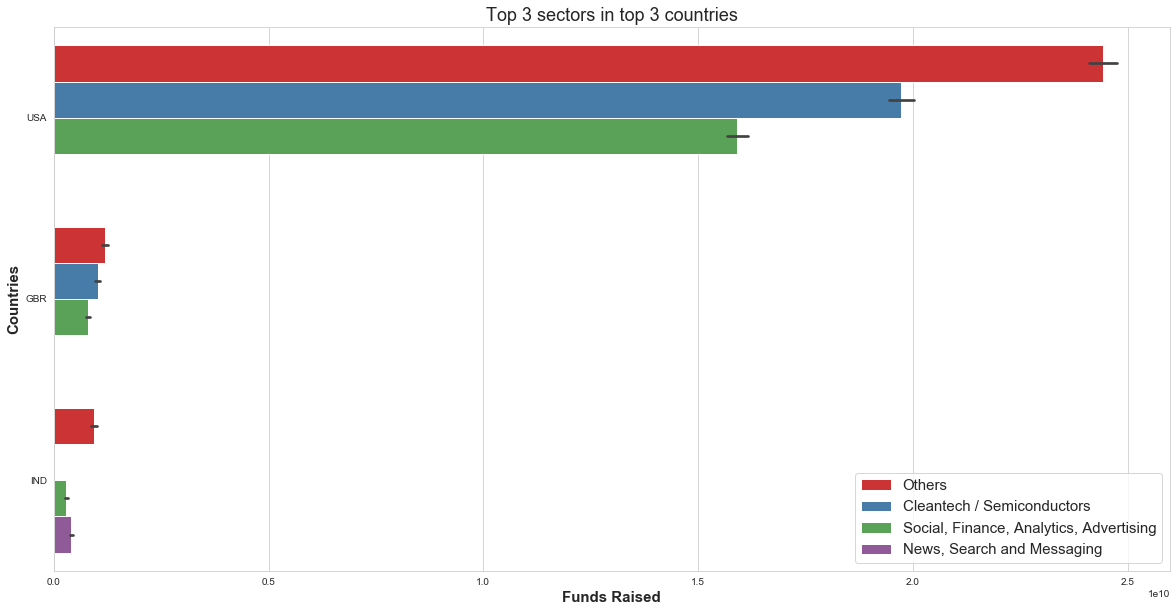

In [97]:
#Part of checkpoint 6: Plots  
#plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#(for the chosen investment type FT).

df1 = d1[(d1['main_sector'] == 'Others') | (d1['main_sector'] == 'Cleantech / Semiconductors') | (d1['main_sector'] == 'Social, Finance, Analytics, Advertising')]
df2 = d2[(d2['main_sector'] == 'Others') | (d2['main_sector'] == 'Cleantech / Semiconductors') | (d2['main_sector'] == 'Social, Finance, Analytics, Advertising')]
df3 = d3[(d3['main_sector'] == 'Others') | (d3['main_sector'] == 'News, Search and Messaging') | (d3['main_sector'] == 'Social, Finance, Analytics, Advertising')]

frames = [df1, df2, df3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector",  palette = "Set1", data=result, estimator=np.sum)
plt.title('Top 3 sectors in top 3 countries', fontsize = 18)
plt.xlabel("Funds Raised", fontsize = 15, weight = 'bold')
plt.ylabel('Countries',fontsize = 15, weight = 'bold')

plt.legend(prop={'size': 15})


plt.show()

# <br><br><br><br>End of Assignment

## By Amit Anand